In [29]:
# !pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from sklearn.linear_model import LinearRegression

from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf

In [3]:
url = 'https://raw.githubusercontent.com/mnuzen/156b-learning-support/master/data/us/covid/deaths.csv'
df = pd.read_csv(url, header=0)

In [12]:
cum_cases = df.iloc[:, 4:]
countyFIPS = df.iloc[:, 0].to_numpy()
cum_cases = cum_cases.to_numpy()
print(cum_cases.shape)

(3195, 109)


In [50]:
# 1/22 - 6/30: 161 days inclusive, day 0 to 160
# 4/1 - 6/30: 91 days inclusive
# 1/22 - 4/1: 70 days excluding 4/1, 4/1 is day 70

# all_zeros = [0 for i in range(91)]
# PREDS = []
# reg = LinearRegression()
# for i in range(len(cum_cases)):
#     if cum_cases[i, -1] == 0: # no training
#         PREDS.append(all_zeros)
#     else:
#         y = cum_cases[i]
#         j = 0
#         while y[j] == 0:
#             j+=1
#         y = y[j:]
#         x = np.array(range(j, j+len(y))).reshape((len(y), 1))
#         x_pred = np.array(range(70, 161)).reshape((91,1))
#         reg.fit(x, y)
#         pred = reg.predict(x_pred)
#         PREDS.append(pred)

all_zeros = np.zeros((91, 9))
PREDS = []
quantiles = np.arange(0.1, 1.0, 0.1)
for i in range(len(cum_cases)):
    if cum_cases[i, -1] == 0: # no training
        PREDS.append(all_zeros)
    else:
        y = cum_cases[i]
        j = 0
        while y[j] == 0:
            j+=1
        y = np.array(y[j:])
        y = y.reshape((len(y), 1))
        x = np.array(range(j, j+len(y))).reshape((len(y), 1))
        
        x_pred = np.array(range(70, 161))
        
        data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

        reg = smf.quantreg('y ~ x', data)
        y_pred = []
        for q in quantiles:
            res = reg.fit(q=q)
            pred = x_pred*res.params[1] + res.params[0]
            y_pred.append(pred)
        PREDS.append(np.reshape(y_pred, (91, 9)))

C:\Users\serena\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\serena\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\serena\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\serena\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\serena\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimi

C:\Users\serena\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\serena\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\serena\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\serena\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\serena\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimi

In [51]:
PREDS = np.array(PREDS)
print(PREDS.shape)

(3195, 91, 9)


In [52]:
FINAL_PRED = []
dates = np.loadtxt('dates.txt', dtype=np.str)
for county in range(len(PREDS)):
    for date in range(len(PREDS[0])):
        heading = dates[date] + '-' + str(countyFIPS[county])
        quantiles = PREDS[county, date, :].clip(0).tolist()
        quantiles.insert(0, heading)
        FINAL_PRED.append(quantiles)

In [60]:
FINAL_PRED = np.array(FINAL_PRED)
print(FINAL_PRED.shape)
print(FINAL_PRED[9960])

(290745, 10)
['2020-05-12-4017' '3.9545450495924683' '4.636363260336047'
 '5.318181471079626' '5.999999681823212' '6.681817892566791'
 '7.36363610331037' '8.045454314053949' '8.727272524797527'
 '9.409090735541113']


In [55]:
df = pd.DataFrame(data={"id": FINAL_PRED[:, 0], 
                        "10": FINAL_PRED[:, 1], 
                        "20": FINAL_PRED[:, 2], 
                        "30": FINAL_PRED[:, 3], 
                        "40": FINAL_PRED[:, 4], 
                        "50": FINAL_PRED[:, 5], 
                        "60": FINAL_PRED[:, 6], 
                        "70": FINAL_PRED[:, 7], 
                        "80": FINAL_PRED[:, 8], 
                        "90": FINAL_PRED[:, 9]})
df.to_csv("./submission_quantreg.csv", sep=',',index=False)

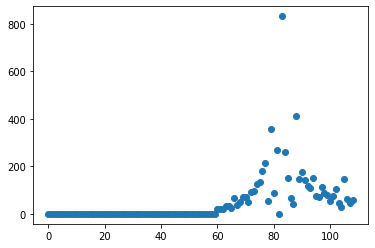

In [24]:
plt.scatter(range(109), daily_cases[1903])